In [1]:
import math
import scipy
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize

0.1353352832366127

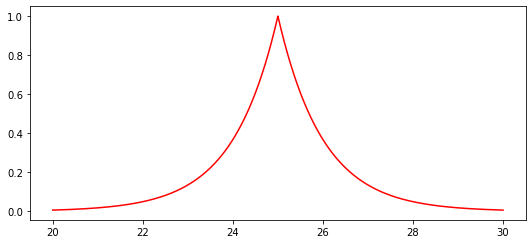

In [2]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

def f(t, fav):
    return math.e ** (-abs(t - fav))

def g(t, req):
    return math.e ** (-abs(t - req))

def h(t, w, fav, req):
    s = w * fav + (1 - w) * req
    return math.e ** (-abs(t - s))
t = np.arange(20, 30, 0.0001)
#plt.plot(t, f(t, 20), 'r')
#plt.plot(t, g(t, 30), 'b')
plt.plot(t, h(t, 0.5, 20, 30), 'r')

h(23, 0.5, 20, 30)

In [3]:
def u_A(t, w_A, t_A, t_B, r):
    s = w_A * t_A + (1 - w_A) * t_B
    u = math.e ** (-abs(t - s)) / (r + 1)
    return u 

def u_B(t, w_B, t_A, t_B, r):
    s = (1 - w_B) * t_A + w_B * t_B
    u =  math.e ** (-abs(t - s)) / (r + 1)
    return u

A sets the temperature as 20 

B: 25.0 	 Utility of B: 1.0
A: 22.49999822002044 	 Utility of A: 0.9999982200220249


B: 23.749998228625792 	 Utility of B: 0.9999991186159581
A: 23.125000250059042 	 Utility of A: 0.9999979742661244


B: 23.437501743629394 	 Utility of B: 0.999997495716157
A: 23.281252666373543 	 Utility of A: 0.9999983304720682


B: 23.35937689352018 	 Utility of B: 0.9999996885187615
A: 23.320313725099016 	 Utility of A: 0.9999989451527099


B: 23.33984479733729 	 Utility of B: 0.9999994880278211
A: 23.330080950840934 	 Utility of A: 0.9999983103786462


B: 23.334962761404977 	 Utility of B: 0.9999998873158723
A: 23.332522109944374 	 Utility of A: 0.9999997461786132


B: 23.333743436766714 	 Utility of B: 0.9999989989084633
A: 23.333132601732423 	 Utility of A: 0.9999998283768937


final rounds: 8


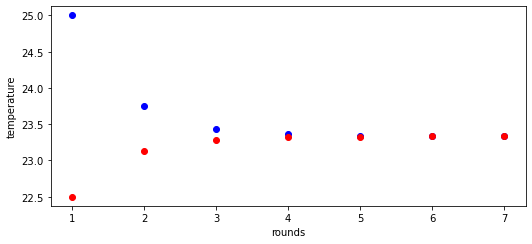

In [11]:
#Model without bargaining cost:
fav_A = 20
fav_B = 30

plt.xlabel("rounds")
plt.ylabel("temperature")

t_A = fav_A #initial bid
t_B = fav_B #initial bid

w_A = 0.5 #selfish coefficient for A
w_B = 0.5 #selfish coefficient for B

r = 1
print("A sets the temperature as", t_A, "\n")
while abs(t_A - t_B) > 0.001 and r < 100:
    u_B_if_bid = -scipy.optimize.minimize_scalar(lambda t: -u_B(t, w_B, t_A, t_B, r = 0), bounds=[fav_A, fav_B], method='bounded')["fun"]
    t_B = scipy.optimize.minimize_scalar(lambda t: -u_B(t, w_B, t_A, t_B, r = 0), bounds=[fav_A, fav_B], method='bounded')["x"]
        
    print("B:", t_B,"\t Utility of B:", u_B_if_bid)
    plt.plot(r, t_B, marker="o", color="blue")

    u_A_if_bid = -scipy.optimize.minimize_scalar(lambda t: -u_A(t, w_A, t_A, t_B, r = 0), bounds=[fav_A, fav_B], method='bounded')["fun"]
    t_A = scipy.optimize.minimize_scalar(lambda t: -u_A(t, w_A, t_A, t_B, r = 0), bounds=[fav_A, fav_B], method='bounded')["x"]
    print("A:", t_A, "\t Utility of A:", u_A_if_bid)
    plt.plot(r, t_A, marker="o", color="red")
    r += 1
    print("\n")
    
print("final rounds:", r)

A sets the temperature as 20 

B: 29.99999508152614 	 Utility of B: 0.003368981784656961
A: 24.99999935651033 	 Utility of A: 0.04104258704006105


B: 29.99999508152614 	 Utility of B: 0.027361724693373935
A: 27.499999072665076 	 Utility of A: 0.09550178953366205


B: 29.99999508152614 	 Utility of B: 0.07162634215024627
A: 28.749997979501522 	 Utility of A: 0.13381555102669312


B: 29.99999508152614 	 Utility of B: 0.10705244082135487
A: 29.37499834856048 	 Utility of A: 0.14632336481086225


B: 29.99999508152614 	 Utility of B: 0.12193613734238477
A: 29.687496320111922 	 Utility of A: 0.1425576428361445


B: 29.99999508152614 	 Utility of B: 0.12219226528812385
A: 29.84374433320032 	 Utility of A: 0.13212120959602108


B: 29.99999508152614 	 Utility of B: 0.11560605839651804
A: 29.99999508152614 	 Utility of A: 0.14285714285714285


final rounds: 8
A chooses to compromise at last.


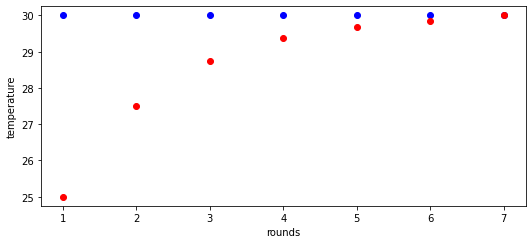

In [73]:
#Model with bargaining cost:

fav_A = 20
fav_B = 30

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.xlabel("rounds")
plt.ylabel("temperature")

t_A = fav_A #initial bid
t_B = fav_B #initial bid

w_A = 0.5 #selfish coefficient for A
w_B = 1 #selfish coefficient for B

r = 1
c = None
print("A sets the temperature as", t_A, "\n")
while t_A != t_B:
    #B makes the choice of whether to bid:
    u_B_if_bid = -scipy.optimize.minimize_scalar(lambda t: -u_B(t, w_B, t_A, t_B, r), bounds=[fav_A, fav_B], method='bounded')["fun"]
    if u_B_if_bid > u_B(t_A, w_B, t_A, t_B, r - 1):
        t_B = scipy.optimize.minimize_scalar(lambda t: -u_B(t, w_B, t_A, t_B, r), bounds=[fav_A, fav_B], method='bounded')["x"]
    else:
        c = "B"
        t_B = t_A
        
    if c == None:
        print("B:", t_B,"\t Utility of B:", u_B(t_B, w_A, t_A, t_B, r))
    else:
        print("B:", t_B,"\t Utility of B:", u_B(t_B, w_A, t_A, t_B, r - 1))
    plt.plot(r, t_B, marker="o", color="blue")
    
    #A makes the choice of whether to bid:
    u_A_if_bid = -scipy.optimize.minimize_scalar(lambda t: -u_A(t, w_A, t_A, t_B, r), bounds=[fav_A, fav_B], method='bounded')["fun"]
    if u_A_if_bid > u_A(t_B, w_A, t_A, t_B, r - 1):
        t_A = scipy.optimize.minimize_scalar(lambda t: -u_A(t, w_A, t_A, t_B, r), bounds=[fav_A, fav_B], method='bounded')["x"]
    else:
        c = "A"
        t_A = t_B
    
    if c == None:
        print("A:", t_A, "\t Utility of A:", u_A(t_A, w_A, t_A, t_B, r))
    else:
        print("A:", t_A, "\t Utility of A:", u_A(t_A, w_A, t_A, t_B, r - 1))
    plt.plot(r, t_A, marker="o", color="red")
    
    r += 1
    print("\n")
    
print("final rounds:", r)
print(c, "chooses to compromise at last.")
    


In [76]:
def find_the_optimal_selfishness_for_B(w, w_A, fav_A, fav_B):
    #set the initial bid
    t_A = fav_A
    t_B = fav_B
    
    w_B = w
    r = 1
    c = None
    t_star = None
    u_B_star = None
    
    while t_A != t_B:
        # B makes the decision:
        u_B_if_bid = -scipy.optimize.minimize_scalar(lambda t: -u_B(t, w_B, t_A, t_B, r), bounds=[fav_A, fav_B], method='bounded')["fun"]
        if u_B_if_bid > u_B(t_A, w_B, t_A, t_B, r - 1):
            t_B = scipy.optimize.minimize_scalar(lambda t: -u_B(t, w_B, t_A, t_B, r), bounds=[fav_A, fav_B], method='bounded')["x"]
        else:
            c = "B"
            t_B_previous = t_B
            t_B = t_A
            
            
        # A makes the decision:
        u_A_if_bid = -scipy.optimize.minimize_scalar(lambda t: -u_A(t, w_A, t_A, t_B, r), bounds=[fav_A, fav_B], method='bounded')["fun"]
        if u_A_if_bid > u_A(t_B, w_A, t_A, t_B, r - 1):
            t_A = scipy.optimize.minimize_scalar(lambda t: -u_A(t, w_A, t_A, t_B, r), bounds=[fav_A, fav_B], method='bounded')["x"]
        else:
            c = "A"
            t_A_previous = t_A
            t_A = t_B
            
        r += 1
    t_star = t_A
    if c == "A":
        u_B_star = u_B(t_B, w_A, t_A_previous, t_B, r - 1)
    else:
        u_B_star = u_B(t_B, w_B, t_A, t_B_previous, r - 2)
    return u_B_star
    


In [109]:
find_the_optimal_selfishness_for_B(w = 1, w_A = 0.5, fav_A = 20, fav_B = 30)


0.11560605839651804

In [111]:
w = np.arange(0, 1, 0.0001)
#plt.plot(w, find_the_optimal_selfishness_for_B(w, w_A = 0.5, fav_A = 20, fav_B = 30))